In [ ]:
!pip install transformers

In [2]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
comments_df = pd.read_csv('comments_df_11-4-2022.csv')
video_df = pd.read_csv('video_info.csv')
comments_df.shape

(58561, 5)

In [4]:
comments_df.head()

Video Id                                               text  \
0  DOtPOfeyJ4Q  Don't send it back. This video is a gem. Bro, ...   
1  DOtPOfeyJ4Q  Hes not scamming his sister probably got it fo...   
2  DOtPOfeyJ4Q  He offered your money back definitely not a sc...   
3  DOtPOfeyJ4Q  Isn‚Äôt it hard authenticate a signature. If Kob...   
4  DOtPOfeyJ4Q  He answered the phone, definitely not trying t...   

                   time          displayID                        id  
0  2022-11-04T15:41:35Z         Tim Gibson  UC8DCyaImyGP2jrJOdD64Efg  
1  2022-11-04T15:04:13Z  The guy who asked  UCNijoEJw5z3p4689tey5oYw  
2  2022-11-04T14:57:57Z              F.B.I  UCXbuhDqmdm_M8UEOrQ77w6w  
3  2022-11-04T14:54:47Z      Olti Hajdaraj  UCPOYMbZKAIN39YFsvMTZ-Uw  
4  2022-11-04T14:49:10Z             Jordan  UCga1Isau1iPAlrezA6xoYSQ

In [5]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58561 entries, 0 to 58560
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Video Id   58561 non-null  object
 1   text       58559 non-null  object
 2   time       58561 non-null  object
 3   displayID  58555 non-null  object
 4   id         58561 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB


In [6]:
comments_df = comments_df.dropna()
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58553 entries, 0 to 58560
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Video Id   58553 non-null  object
 1   text       58553 non-null  object
 2   time       58553 non-null  object
 3   displayID  58553 non-null  object
 4   id         58553 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB


In [7]:
comments_df['time'] = pd.to_datetime(comments_df['time'])
comments_df.dtypes

Video Id                  object
text                      object
time         datetime64[ns, UTC]
displayID                 object
id                        object
dtype: object

In [8]:
comments_df['discrete_hour'] = comments_df['time'].dt.hour
comments_df['discrete_dow'] = comments_df['time'].dt.dayofweek
comments_df['discrete_month'] = comments_df['time'].dt.month
comments_df['discrete_year'] = comments_df['time'].dt.year

In [9]:
comments_df.columns

Index(['Video Id', 'text', 'time', 'displayID', 'id', 'discrete_hour',
       'discrete_dow', 'discrete_month', 'discrete_year'],
      dtype='object')

In [10]:
comments_df_copy = comments_df.copy()
comments_df_copy['count'] = 1
comments_df_copy = comments_df_copy.set_index('time').resample('3D').sum()
comments_df_copy

discrete_hour  discrete_dow  discrete_month  \
time                                                                     
2021-03-12 00:00:00+00:00              3            15               9   
2021-03-15 00:00:00+00:00              0             0               0   
2021-03-18 00:00:00+00:00             18             5               3   
2021-03-21 00:00:00+00:00             54             8               9   
2021-03-24 00:00:00+00:00             43             8               9   
...                                  ...           ...             ...   
2022-10-21 00:00:00+00:00           3660          1605            3220   
2022-10-24 00:00:00+00:00           4403           422            3700   
2022-10-27 00:00:00+00:00           4793          1631            4070   
2022-10-30 00:00:00+00:00          29325          2648           19686   
2022-11-02 00:00:00+00:00          19330          4673           19866   

                           discrete_year  count  
time                                             
2021-03-12 00:00:00+00:00           6063      3  
2021-03-15 00:00:00+00:00              0      0  
2021-03-18 00:00:00+00:00           2021      1  
2021-03-21 00:00:00+00:00           6063      3  
2021-03-24 00:00:00+00:00           6063      3  
...                                  ...    ...  
2022-10-21 00:00:00+00:00         651084    322  
2022-10-24 00:00:00+00:00         748140    370  
2022-10-27 00:00:00+00:00         822954    407  
2022-10-30 00:00:00+00:00        3690150   1825  
2022-11-02 00:00:00+00:00        3651732   1806  

[201 rows x 5 columns]

<AxesSubplot:xlabel='time'>

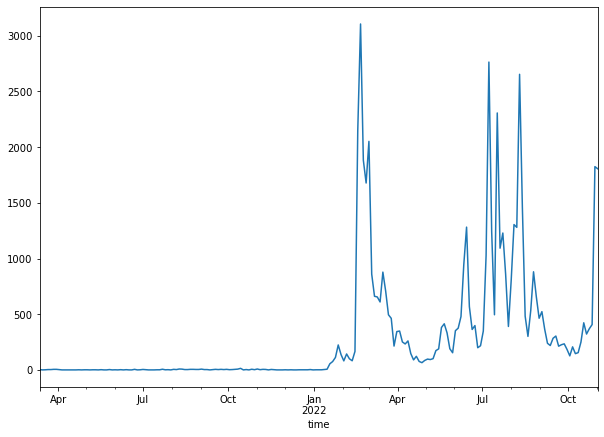

In [11]:
plt.figure(figsize = (10 , 7))
comments_df_copy['count'].plot()

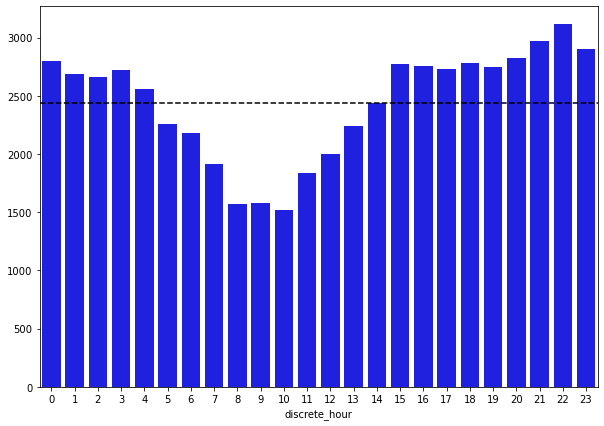

In [12]:
comments_df_grouped = comments_df.groupby('discrete_hour')['id'].size()
plt.figure(figsize = (10, 7))
sns.barplot(x  = comments_df_grouped.index  , y = comments_df_grouped.values , color = 'blue')
plt.axhline(y = np.mean(comments_df_grouped.values) , color = 'black' , linestyle = '--');

## Sentiment Analysis

In [13]:
text_lst = comments_df['text'].tolist()

In [14]:
len_sen = [len(sentence.split(' ')) for sentence in text_lst]
len(text_lst)

58553

C:\Users\salaz\anaconda3\envs\youtube_comments_project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

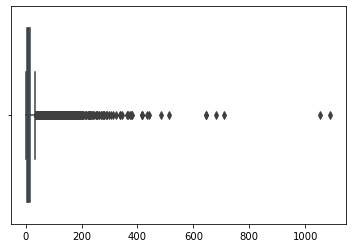

In [15]:
sns.boxplot(len_sen)

In [16]:
output_seq_len = int(np.percentile(len_sen , 95))
output_seq_len

43

In [17]:
comments_df['comment_length'] = len_sen

In [18]:
comments_df = comments_df[comments_df['comment_length'] <= 43]
comments_df.shape

(55709, 10)

<AxesSubplot:xlabel='comment_length', ylabel='Video Id'>

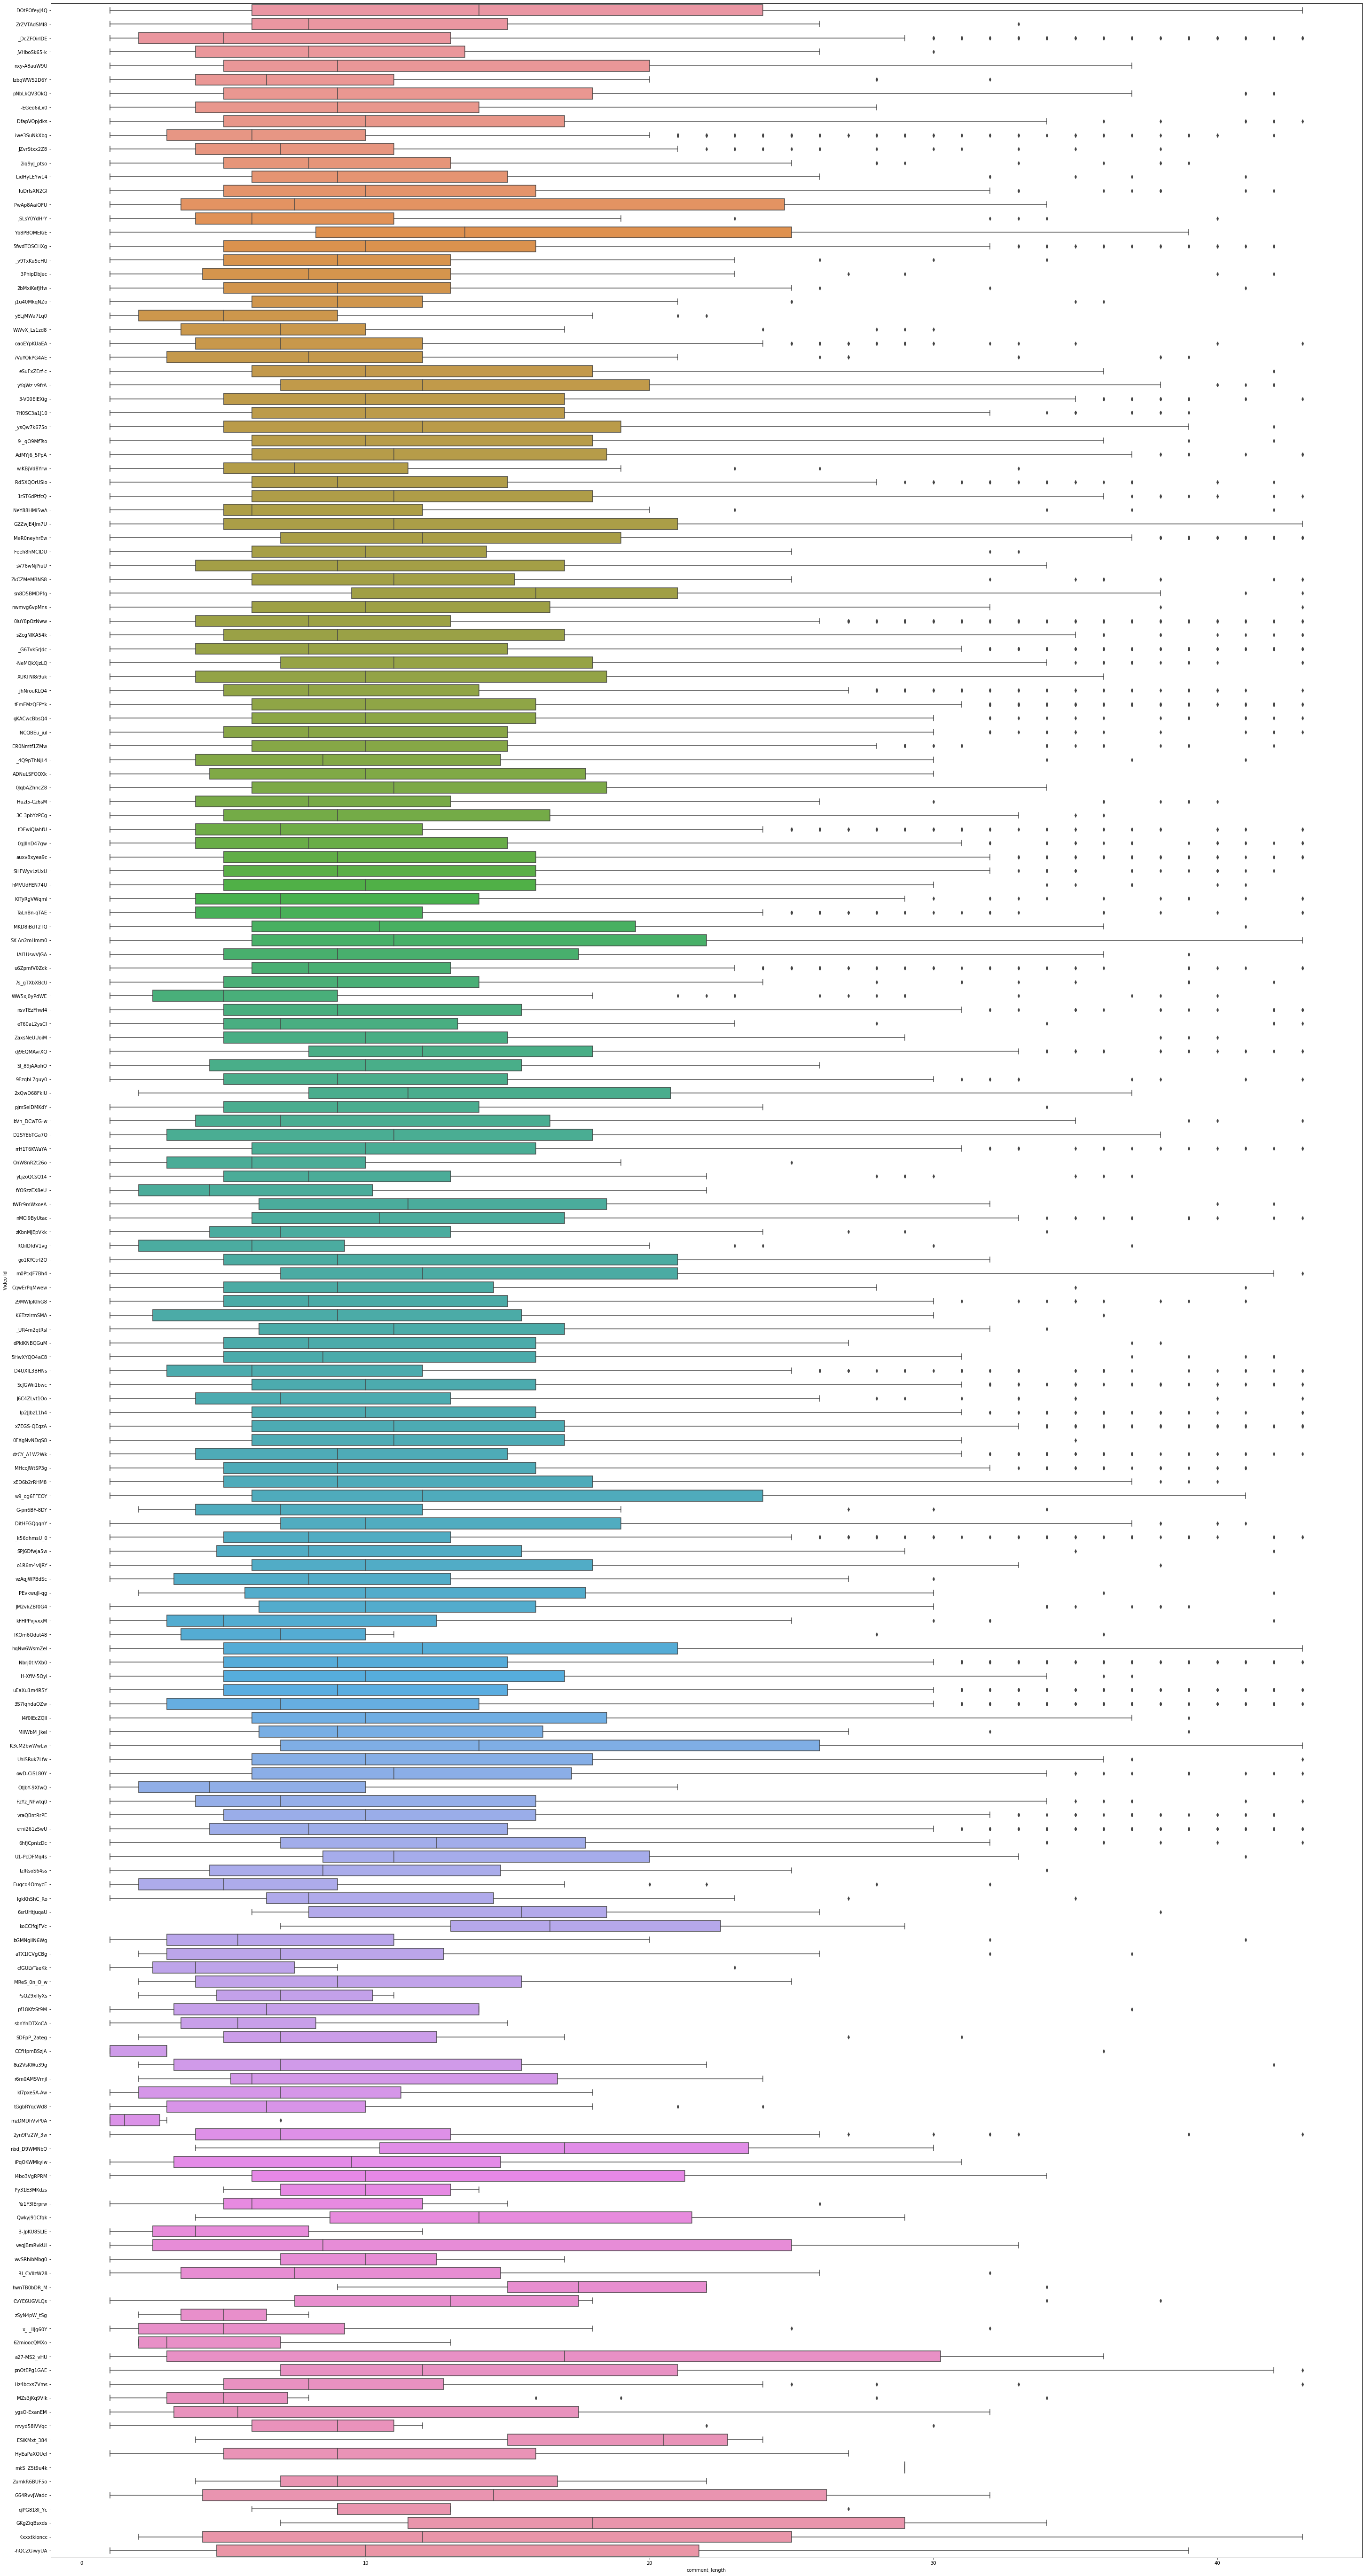

In [19]:
plt.figure(figsize = (50, 100))
sns.boxplot(x = 'comment_length' , y = 'Video Id', data = comments_df)

In [20]:
comments_df.columns

Index(['Video Id', 'text', 'time', 'displayID', 'id', 'discrete_hour',
       'discrete_dow', 'discrete_month', 'discrete_year', 'comment_length'],
      dtype='object')

In [21]:
pipe = pipeline(model = 'cardiffnlp/twitter-roberta-base-sentiment-latest')
pipe.tokenizer.model_max_length=256
print(pipe.tokenizer)

Downloading:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


PreTrainedTokenizerFast(name_or_path='cardiffnlp/twitter-roberta-base-sentiment-latest', vocab_size=50265, model_max_len=256, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})


In [22]:
comments_df.shape

(55709, 10)

In [23]:
text_lst_new = comments_df['text'].tolist()
sent_dicts = pipe(text_lst_new[:1000])

## Sampling

In [24]:
pd.options.mode.chained_assignment = None  # default='warn'
video_df_100_comments = video_df[video_df['comment_count'] >= 100]
video_df_100_comments.reset_index(inplace = True , drop = True)
video_df_100_comments.drop('Unnamed: 0' , axis = 1 , inplace = True)

video_list = video_df_100_comments['video_id'].tolist()

video_df_100_comments.shape

(84, 6)

In [25]:
sampled_df = pd.DataFrame(columns = comments_df.columns)
for video in video_list:
    vid_comments_df = comments_df[comments_df['Video Id'] == video]
    vid_comments_df_samples = vid_comments_df.sample(n = 100 , replace = True)
    sampled_df = pd.concat([sampled_df , vid_comments_df_samples] , axis = 0)
sampled_df.shape

(8400, 10)

<AxesSubplot:xlabel='comment_length', ylabel='Video Id'>

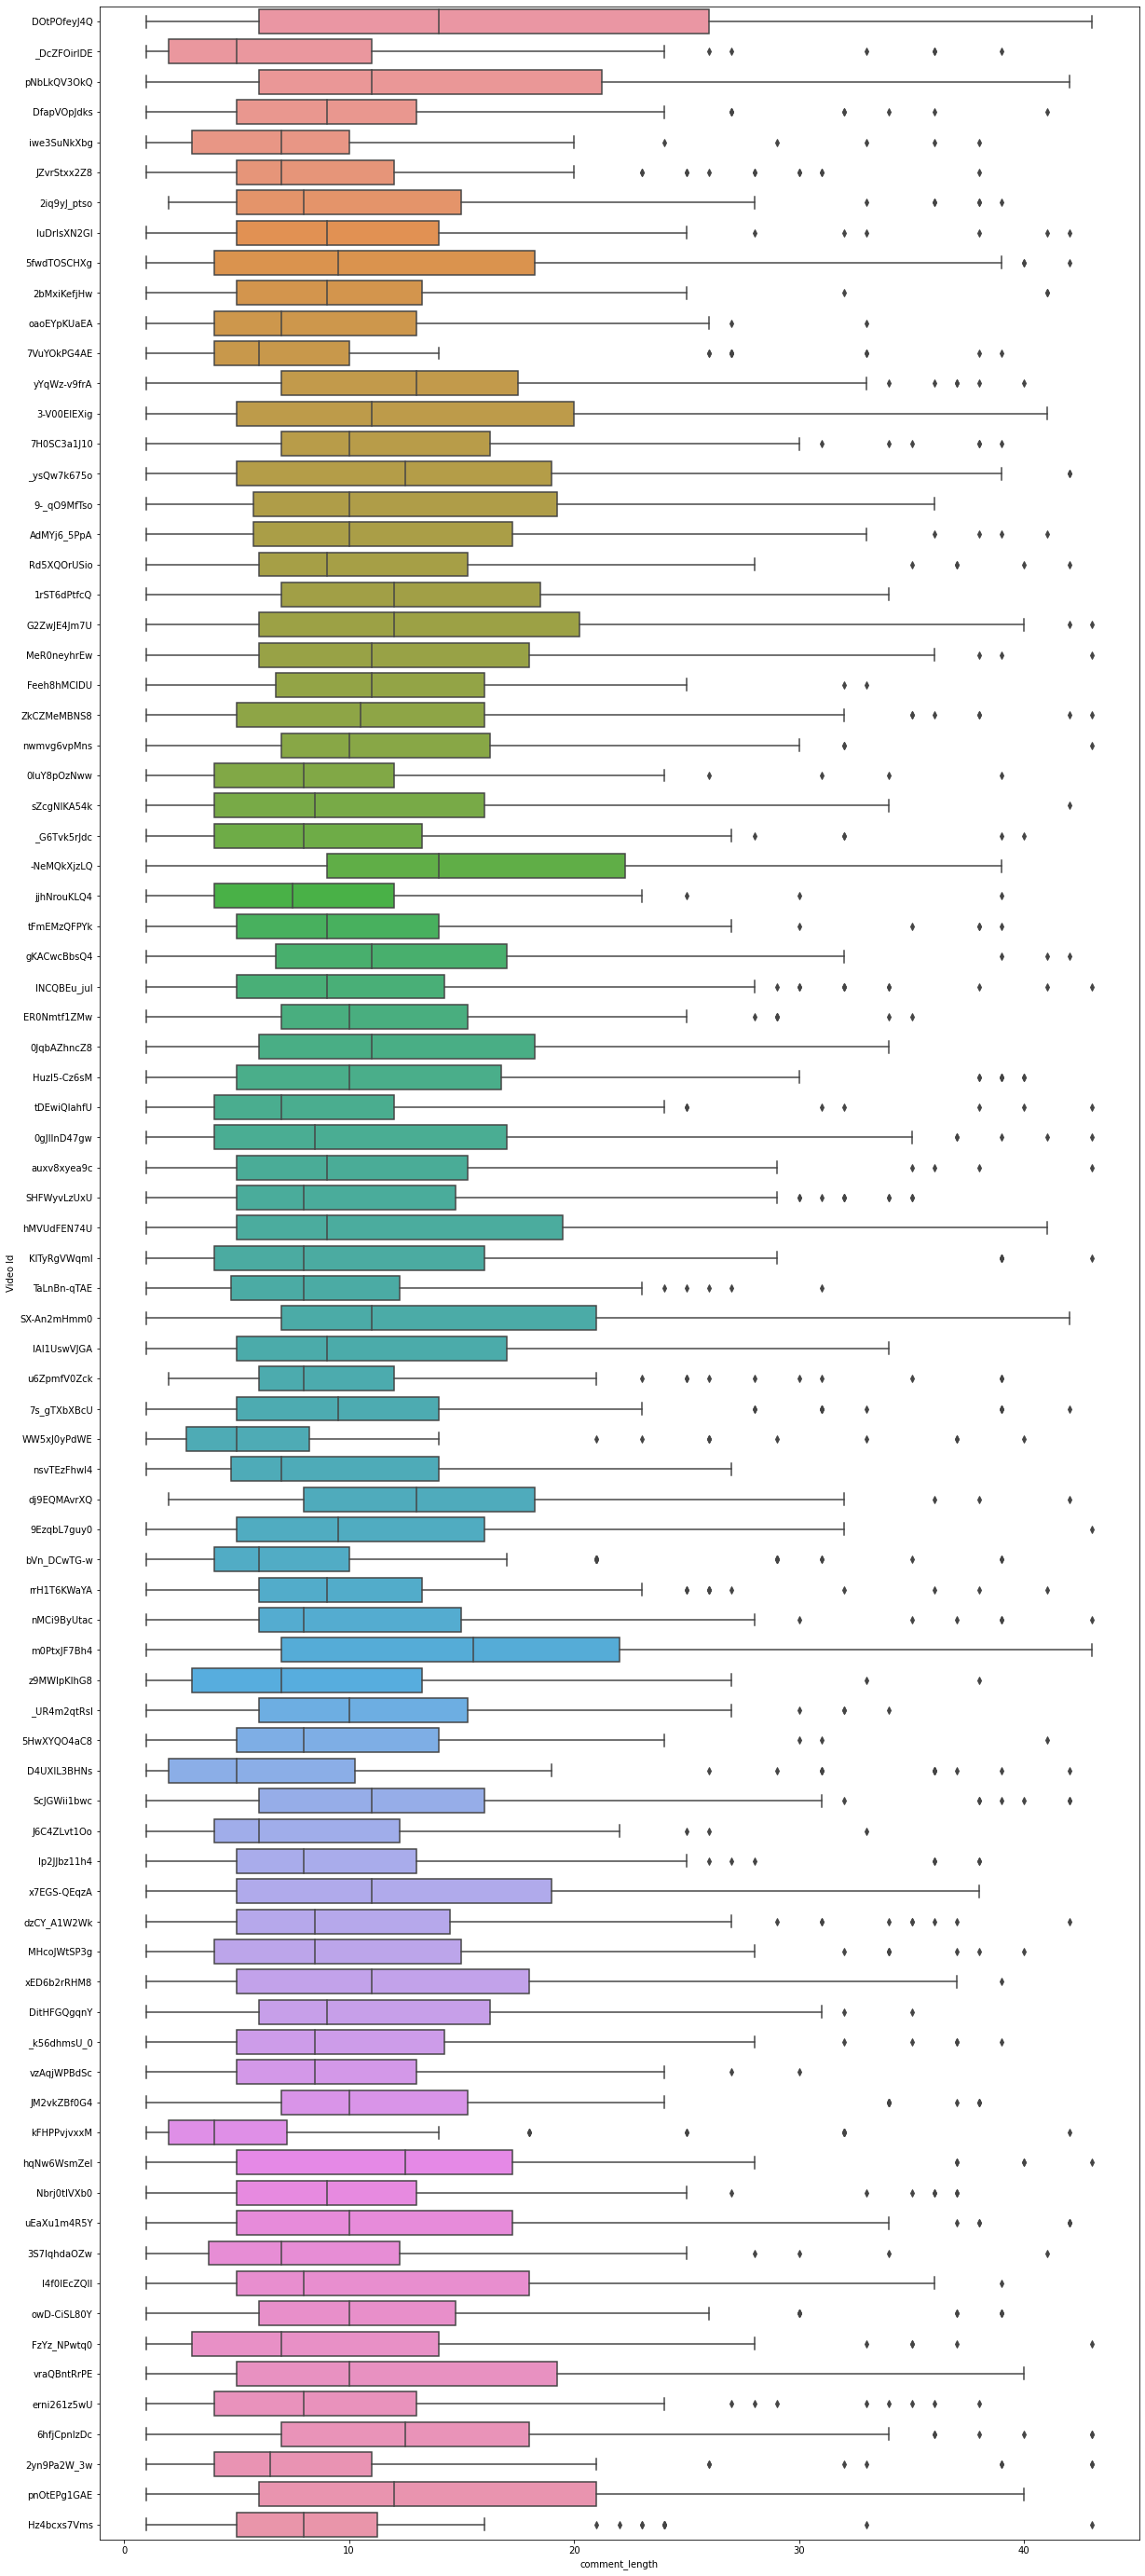

In [26]:
plt.figure(figsize = (20, 50))
sns.boxplot(x = 'comment_length' , y = 'Video Id' , data = sampled_df)

In [102]:
pipe = pipeline(model = 'cardiffnlp/twitter-roberta-base-sentiment-latest')
pipe.tokenizer.model_max_length=256
print(pipe.tokenizer)

Downloading:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


PreTrainedTokenizerFast(name_or_path='cardiffnlp/twitter-roberta-base-sentiment-latest', vocab_size=50265, model_max_len=256, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})


In [27]:
sample_sent_dicts = pipe(sampled_df.text.tolist())
print(len(sample_sent_dicts))

8400


In [28]:
labels = []
confidence = []

for dict_ in sample_sent_dicts:
    labels.append(dict_['label'])
    confidence.append(dict_['score'])

sampled_df['label'] = labels
sampled_df['confidence'] = confidence
sampled_df.head()

Video Id                                               text  \
52  DOtPOfeyJ4Q                                    Send it back!!!   
12  DOtPOfeyJ4Q  It‚Äôs real bro, dude is way too chill, and like...   
54  DOtPOfeyJ4Q                          Loved the attitude of guy   
64  DOtPOfeyJ4Q  The k actually looks really good...but why wou...   
37  DOtPOfeyJ4Q                 Imagine if it truly is a real ball   

                         time       displayID                        id  \
52  2022-11-03 00:42:19+00:00     oakstbomber  UCvWyGfnGjbInLedFeDv3CuA   
12  2022-11-04 09:43:22+00:00  Mychael Shakur  UCVguhBQCXLopp8GVVCK_MYg   
54  2022-11-03 00:32:56+00:00       agha saad  UCV2pCPLvyOBYc9SPvDvGv5Q   
64  2022-11-02 22:19:27+00:00          Kaay R  UCdtZPiB-bLPzeo1AQfvt6dg   
37  2022-11-03 10:55:15+00:00       Quckeyalt  UC8jT5P11TKujt-71DYYbs_g   

   discrete_hour discrete_dow discrete_month discrete_year comment_length  \
52             0            3             11          2022              3   
12             9            4             11          2022             43   
54             0            3             11          2022              5   
64            22            2             11          2022             27   
37            10            3             11          2022              8   

       label  confidence  
52   Neutral    0.577005  
12   Neutral    0.584450  
54  Positive    0.959856  
64  Positive    0.640305  
37   Neutral    0.600259

In [29]:
sampled_df.to_csv('sampled_df.csv')

<AxesSubplot:xlabel='confidence', ylabel='Video Id'>

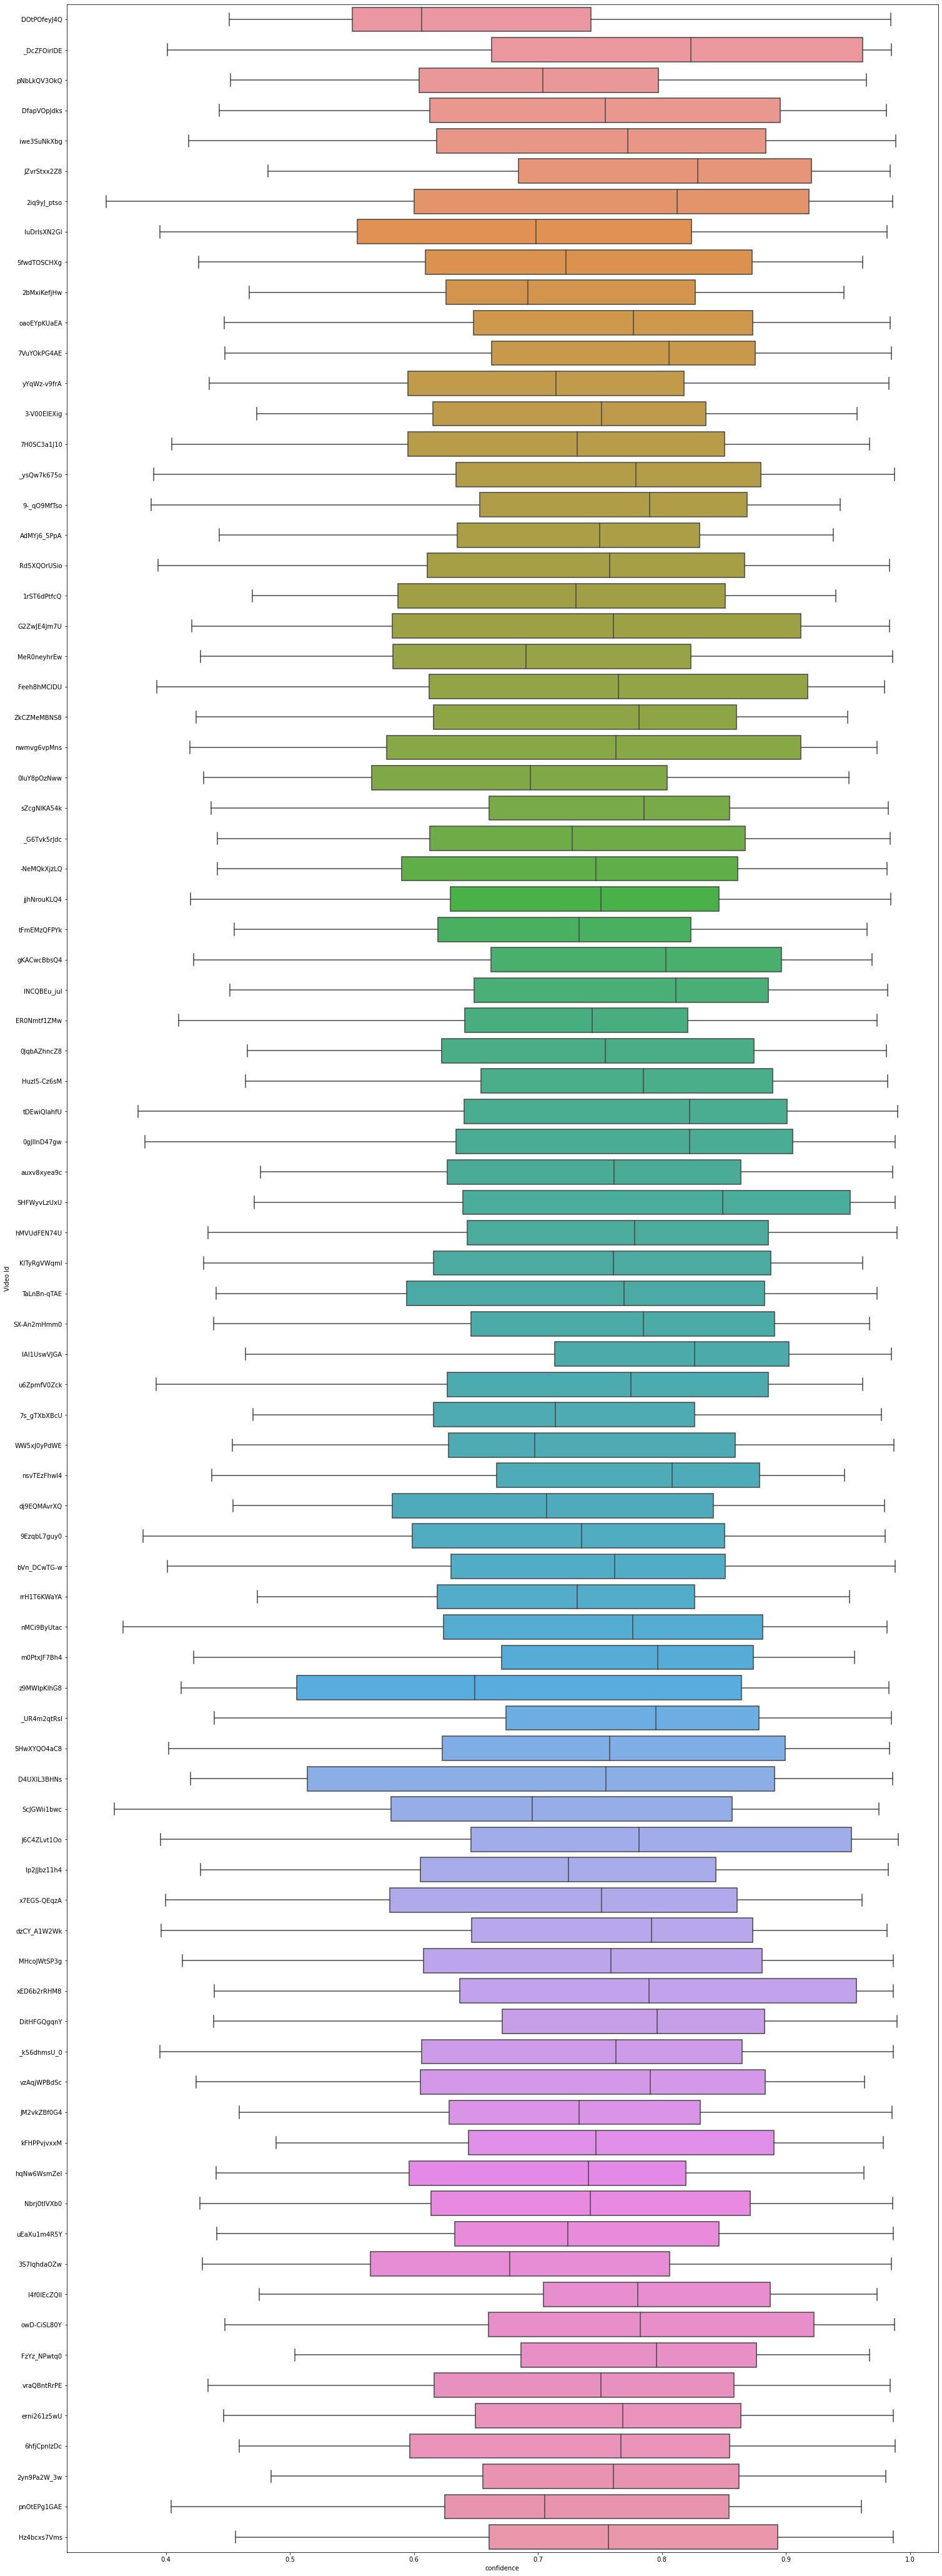

In [30]:
plt.figure(figsize = (25, 75))
sns.boxplot(x = 'confidence' ,  y = 'Video Id' , data = sampled_df)

<AxesSubplot:xlabel='confidence'>

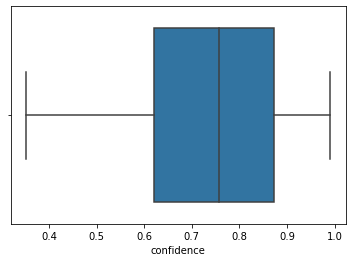

In [31]:
sns.boxplot(x = 'confidence'  , data = sampled_df)

In [32]:
sampled_df.groupby('label')['confidence'].mean()

label
Negative    0.769300
Neutral     0.691337
Positive    0.800390
Name: confidence, dtype: float64

<AxesSubplot:xlabel='confidence', ylabel='label'>

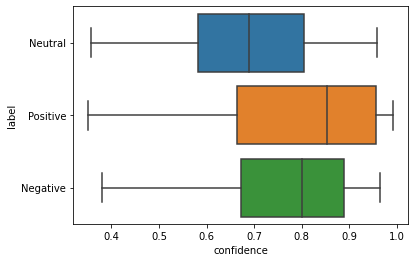

In [33]:
sns.boxplot(x = 'confidence' ,  y = 'label' , data = sampled_df)

### Positive Comments

In [34]:
positive_comments = sampled_df[sampled_df['label'] == 'Positive']

In [35]:
positive_comments.groupby('Video Id')['confidence'].agg(['size' , 'mean']).sort_values('size' , ascending = False)

size      mean
Video Id                   
_DcZFOirIDE    72  0.849095
G2ZwJE4Jm7U    64  0.816252
iwe3SuNkXbg    52  0.796990
J6C4ZLvt1Oo    49  0.897647
D4UXIL3BHNs    45  0.725208
...           ...       ...
pNbLkQV3OkQ     5  0.827089
AdMYj6_5PpA     5  0.693873
9-_qO9MfTso     4  0.749924
nsvTEzFhwl4     3  0.666520
MeR0neyhrEw     2  0.821274

[84 rows x 2 columns]

### Negative Comments

In [36]:
negative_comments = sampled_df[sampled_df['label'] == 'Negative']

In [37]:
negative_comments.groupby('Video Id')['confidence'].agg(['size' , 'mean']).sort_values('size' , ascending = False)[:10]

size      mean
Video Id                   
owD-CiSL80Y    67  0.813849
nwmvg6vpMns    66  0.786975
m0PtxJF7Bh4    64  0.795996
MeR0neyhrEw    60  0.749742
0gJlInD47gw    59  0.790624
0JqbAZhncZ8    59  0.736396
2yn9Pa2W_3w    58  0.785043
erni261z5wU    56  0.773922
nMCi9ByUtac    55  0.795106
z9MWIpKlhG8    53  0.754892

### Mapping Sentiment to number (scaled by confidence)

In [38]:
mapping_func = {'Positive' : 1,
               'Negative' : -1 ,
               'Neutral' : 0}

sampled_df['sentiment_num'] = sampled_df['label'].map(mapping_func)

In [39]:
sampled_df['sentiment_num'].value_counts()

 0    3635
-1    3158
 1    1607
Name: sentiment_num, dtype: int64

In [41]:
sampled_df['sentiment_num_scaled'] = sampled_df['sentiment_num'] * sampled_df['confidence']

In [47]:
df_sentiment_scores = pd.DataFrame(sampled_df.groupby('Video Id')['sentiment_num_scaled'].agg(['std' ,'var', 'mean']).sort_values('mean' , ascending = False)).reset_index()

In [46]:
sampled_df.columns

Index(['Video Id', 'text', 'time', 'displayID', 'id', 'discrete_hour',
       'discrete_dow', 'discrete_month', 'discrete_year', 'comment_length',
       'label', 'confidence', 'sentiment_num', 'sentiment_num_scaled'],
      dtype='object')

In [49]:
df_sentiment_scores.shape

(84, 4)

### Merging with the video_df

In [53]:
display(video_df.head())
print(video_df.shape)

Unnamed: 0     video_id                                        video_title  \
0           0  DOtPOfeyJ4Q  Confronting the seller of a questionable Kobe ...   
1           1  ZrZVTAdSMl8  Do experts think my cheap Kobe autograph is real?   
2           2  _DcZFOirIDE                          Anyone need a new camera?   
3           3  JVHboSk65-k  I asked collectors if my cheap Kobe autographs...   
4           4  nxy-A8auW9U      Unboxing a $400 Kobe autographed ball (real?)   

  upload_date  view_count  like_count  comment_count  
0  2022-11-02      781610       62761            447  
1  2022-11-01      113539        9483             57  
2  2022-11-01       40723        3162           3230  
3  2022-10-31      971564       78562             70  
4  2022-10-28      501415       46803             70

(184, 7)


In [54]:
video_df_top = video_df[video_df['video_id'].isin(video_list)]

In [55]:
print(video_df_top.shape , video_df.shape)

(84, 7) (184, 7)


In [56]:
video_df_top = video_df_top.merge(right = df_sentiment_scores , how = 'inner' , left_on = 'video_id' , right_on = 'Video Id')
video_df_top.head()

Unnamed: 0     video_id                                        video_title  \
0           0  DOtPOfeyJ4Q  Confronting the seller of a questionable Kobe ...   
1           2  _DcZFOirIDE                          Anyone need a new camera?   
2           6  pNbLkQV3OkQ  Is the cheapest Kobe autographed ball online r...   
3           8  DfapVOpJdks      How much gold I found in $100 Amazon pay dirt   
4           9  iwe3SuNkXbg           I bought $500 worth of G-ShockÔøºÔøº watches   

  upload_date  view_count  like_count  comment_count     Video Id       std  \
0  2022-11-02      781610       62761            447  DOtPOfeyJ4Q  0.496749   
1  2022-11-01       40723        3162           3230  _DcZFOirIDE  0.445874   
2  2022-10-26     2103937      141783            220  pNbLkQV3OkQ  0.444558   
3  2022-10-20     1835207      110940            606  DfapVOpJdks  0.587798   
4  2022-10-14     1162979       75225           1536  iwe3SuNkXbg  0.551894   

        var      mean  
0  0.246759 -0.055388  
1  0.198803  0.595024  
2  0.197632 -0.276378  
3  0.345507 -0.269783  
4  0.304587  0.337108

In [58]:
video_df_top.drop(['Unnamed: 0' , 'Video Id' , 'var'] , axis = 1 ,inplace = True)

In [64]:
video_df_top.rename(
                    {
                        'mean':'mean_sentiment_score',
                        'std' : 'std_sentiment_score'
                    } , axis = 1 ,inplace = True)

video_df_top

video_id                                        video_title  \
0   DOtPOfeyJ4Q  Confronting the seller of a questionable Kobe ...   
1   _DcZFOirIDE                          Anyone need a new camera?   
2   pNbLkQV3OkQ  Is the cheapest Kobe autographed ball online r...   
3   DfapVOpJdks      How much gold I found in $100 Amazon pay dirt   
4   iwe3SuNkXbg           I bought $500 worth of G-ShockÔøºÔøº watches   
..          ...                                                ...   
79  erni261z5wU     I tried flipping NFTs‚Ä¶ here‚Äôs how much I made.   
80  6hfjCpnlzDc    I tried finding profitable sneakers at Kohl‚Äôs üòñ   
81  2yn9Pa2W_3w              I got thumbnail advice from MrBeast üòè   
82  pnOtEPg1GAE                    How Yeti Charges $35 For A Cup‚Ä¶   
83  Hz4bcxs7Vms       The genius marketing behind NELK  Full Send‚Ä¶   

   upload_date  view_count  like_count  comment_count  std_sentiment_score  \
0   2022-11-02      781610       62761            447             0.496749   
1   2022-11-01       40723        3162           3230             0.445874   
2   2022-10-26     2103937      141783            220             0.444558   
3   2022-10-20     1835207      110940            606             0.587798   
4   2022-10-14     1162979       75225           1536             0.551894   
..         ...         ...         ...            ...                  ...   
79  2021-10-27     4474616      168062           1917             0.515903   
80  2021-10-20      650797       39161            150             0.616944   
81  2021-09-02      532261       45826            225             0.599643   
82  2021-08-04     1038455       37628            691             0.549315   
83  2021-08-02      154792        4941            109             0.508880   

    mean_sentiment_score  
0              -0.055388  
1               0.595024  
2              -0.276378  
3              -0.269783  
4               0.337108  
..                   ...  
79             -0.370715  
80             -0.178916  
81             -0.330729  
82             -0.268774  
83             -0.254675  

[84 rows x 8 columns]

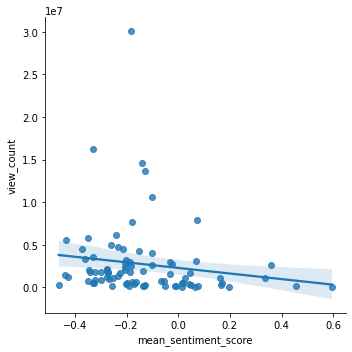

In [73]:
sns.lmplot(x = 'mean_sentiment_score' ,  y = 'view_count' , data = video_df_top)

In [76]:
video_df_top['upload_date'] = pd.to_datetime(video_df_top['upload_date'])
video_df_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   video_id              84 non-null     object        
 1   video_title           84 non-null     object        
 2   upload_date           84 non-null     datetime64[ns]
 3   view_count            84 non-null     int64         
 4   like_count            84 non-null     int64         
 5   comment_count         84 non-null     int64         
 6   std_sentiment_score   84 non-null     float64       
 7   mean_sentiment_score  84 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 5.9+ KB


In [77]:
video_df_top = video_df_top.sort_values('upload_date' , ascending = True)
video_df_top

video_id                                        video_title  \
83  Hz4bcxs7Vms       The genius marketing behind NELK  Full Send‚Ä¶   
82  pnOtEPg1GAE                    How Yeti Charges $35 For A Cup‚Ä¶   
81  2yn9Pa2W_3w              I got thumbnail advice from MrBeast üòè   
80  6hfjCpnlzDc    I tried finding profitable sneakers at Kohl‚Äôs üòñ   
79  erni261z5wU     I tried flipping NFTs‚Ä¶ here‚Äôs how much I made.   
..          ...                                                ...   
4   iwe3SuNkXbg           I bought $500 worth of G-ShockÔøºÔøº watches   
3   DfapVOpJdks      How much gold I found in $100 Amazon pay dirt   
2   pNbLkQV3OkQ  Is the cheapest Kobe autographed ball online r...   
1   _DcZFOirIDE                          Anyone need a new camera?   
0   DOtPOfeyJ4Q  Confronting the seller of a questionable Kobe ...   

   upload_date  view_count  like_count  comment_count  std_sentiment_score  \
83  2021-08-02      154792        4941            109             0.508880   
82  2021-08-04     1038455       37628            691             0.549315   
81  2021-09-02      532261       45826            225             0.599643   
80  2021-10-20      650797       39161            150             0.616944   
79  2021-10-27     4474616      168062           1917             0.515903   
..         ...         ...         ...            ...                  ...   
4   2022-10-14     1162979       75225           1536             0.551894   
3   2022-10-20     1835207      110940            606             0.587798   
2   2022-10-26     2103937      141783            220             0.444558   
1   2022-11-01       40723        3162           3230             0.445874   
0   2022-11-02      781610       62761            447             0.496749   

    mean_sentiment_score  
83             -0.254675  
82             -0.268774  
81             -0.330729  
80             -0.178916  
79             -0.370715  
..                   ...  
4               0.337108  
3              -0.269783  
2              -0.276378  
1               0.595024  
0              -0.055388  

[84 rows x 8 columns]

<AxesSubplot:>

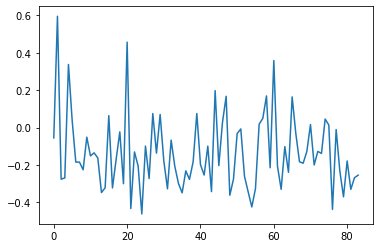

In [78]:
video_df_top['mean_sentiment_score'].plot()